# Анализ аудитории. За 2013-2019гг

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_table(f'data/src/{2013}/part-00000', index_col=False, header=None,
              names=['id', 'biketype', 'starttime', 'endtime', 'startstation', 'endstation',
                     'startlat', 'startlng', 'endlat', 'endlng', 'member_casual', 'gender', 'age',
                     'bikeid'], sep=',')

for i in range(2014, 2020):
    df2 = pd.read_table(f'data/src/{i}/part-00000', index_col=False, header=None,
              names=['id', 'biketype', 'starttime', 'endtime', 'startstation', 'endstation',
                     'startlat', 'startlng', 'endlat', 'endlng', 'member_casual', 'gender', 'age',
                     'bikeid'], sep=',')
    df = pd.concat([df, df2])

In [19]:
df

,id,biketype,starttime,endtime,startstation,endstation,startlat,startlng,endlat,endlng,member_casual,gender,age,bikeid
0,126212,NaN,2013-07-29T19:03:00,2013-07-29T19:21:00,Sheffield Ave & Fullerton Ave,Aberdeen St & Madison St,Chicago,41.925602,NaN,NaN,Customer,NaN,NaN,847
1,153535,NaN,2013-08-04T00:22:00,2013-08-04T00:46:00,Sheffield Ave & Fullerton Ave,Aberdeen St & Madison St,Chicago,41.925602,NaN,NaN,Customer,NaN,NaN,513
2,74162,NaN,2013-07-17T23:45:00,2013-07-18T00:09:00,Sheffield Ave & Fullerton Ave,Aberdeen St & Madison St,Chicago,41.925602,NaN,NaN,Subscriber,Male,25.0,505
3,572092,NaN,2013-09-23T19:58:00,2013-09-23T20:24:00,Sheffield Ave & Fullerton Ave,Aberdeen St & Madison St,Chicago,41.925602,NaN,NaN,Subscriber,Male,38.0,2407
4,71712,NaN,2013-07-17T09:53:00,2013-07-17T10:18:00,State St & 16th St,Aberdeen St & Madison St,NaN,NaN,NaN,NaN,Customer,NaN,NaN,587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4522053,22344864,NaN,2019-04-17T15:16:28,2019-04-17T15:24:40,Halsted St & 69th St,Perry Ave & 69th St,Chicago,41.769062,Chicago,41.769293,Subscriber,Male,62.0,2831
4522054,22531855,NaN,2019-05-04T18:31:46,2019-05-04T18:37:32,Halsted St & 69th St,Perry Ave & 69th St,Chicago,41.769062,Chicago,41.769293,Subscriber,Male,32.0,5506
4522055,23010614,NaN,2019-06-05T21:34:32,2019-06-06T20:57:12,Halsted St & 69th St,Perry Ave & 69th St,Chicago,41.769062,Chicago,41.769293,Customer,Female,43.0,4391
4522056,23423527,NaN,2019-06-28T10:33:17,2019-06-28T10:39:47,Halsted St & 69th St,Perry Ave & 69th St,Chicago,41.769062,Chicago,41.769293,Subscriber,Male,32.0,6317


In [20]:
age_payment = df[['age', 'member_casual']]
age_payment = age_payment.dropna()
age_payment

,age,member_casual
2,25.0,Subscriber
3,38.0,Subscriber
6,37.0,Subscriber
7,52.0,Subscriber
8,41.0,Subscriber
...,...,...
4522053,62.0,Subscriber
4522054,32.0,Subscriber
4522055,43.0,Customer
4522056,32.0,Subscriber


In [21]:
age_payment_cust = age_payment[age_payment['member_casual'] == 'Customer']
age_payment_sub = age_payment[age_payment['member_casual'] == 'Subscriber']

age_bins_sub = pd.cut(age_payment_sub['age'],
                    [0, 15, 18, 21, 24, 27, 30, 35, 40, 45, 50, 55, 60, 70, 90, age_payment_sub['age'].max()],
                    include_lowest=True)
age_bins_cust = pd.cut(age_payment_cust['age'],
                    [0, 15, 18, 21, 24, 27, 30, 35, 40, 45, 50, 55, 60, 70, 90, age_payment_cust['age'].max()],
                    include_lowest=True)
age_payment_sub['age_bins'] = age_bins_sub
age_payment_cust['age_bins'] = age_bins_cust

/var/folders/hl/t6sk4wm51pl391hqq4jv44hm0000gp/T/ipykernel_1371/2241500041.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_payment_sub['age_bins'] = age_bins_sub
/var/folders/hl/t6sk4wm51pl391hqq4jv44hm0000gp/T/ipykernel_1371/2241500041.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_payment_cust['age_bins'] = age_bins_cust


### График кол-ва поездок по возрасту в зависимости от типа оплаты

Видим тенденцию, что чем старше пользователь (до 35 лет), тем больше  платит по подписке, а после 35-40 лет идет резкий спад.
Но все же, многие платят по подписке. Не существует ли она тогда в убыток компании?


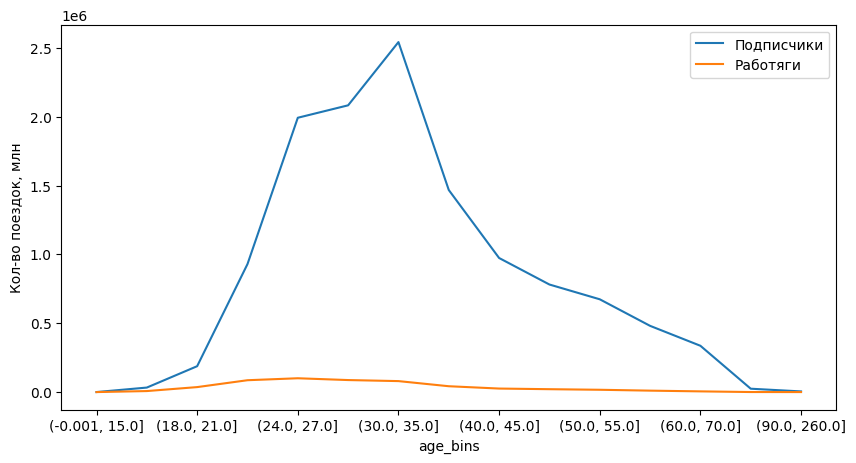

In [22]:
age_payment_sub = age_payment_sub.groupby('age_bins')['member_casual'].count()
age_payment_cust = age_payment_cust.groupby('age_bins')['member_casual'].count()

plt.figure(figsize=(10, 5))
plt.xlabel('Возрастные отрезки, года')
plt.ylabel('Кол-во поездок, млн')
age_payment_sub.plot()
age_payment_cust.plot()
plt.legend(['Подписчики', 'Работяги'])
plt.show()

In [23]:
age_time = df[['age', 'starttime', 'endtime']]
age_time['starttime'] = pd.to_datetime(age_time['starttime'])
age_time['endtime'] = pd.to_datetime(age_time['endtime'])
age_time['duration'] = round((age_time['endtime'] - age_time['starttime']).dt.seconds / 60)
age_time2 = age_time[['age', 'duration']]

age_bins = pd.cut(age_time2['age'],
                  [0, 15, 18, 21, 24, 27, 30, 35, 40, 45, 50, 55, 60, 70, 90, age_time2['age'].max()],
                  include_lowest=True)
age_time2['age_bins'] = age_bins
age_time2 = age_time2.dropna().groupby('age_bins')['duration'].mean()
age_time2

/var/folders/hl/t6sk4wm51pl391hqq4jv44hm0000gp/T/ipykernel_1371/2791837357.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_time['starttime'] = pd.to_datetime(age_time['starttime'])
/var/folders/hl/t6sk4wm51pl391hqq4jv44hm0000gp/T/ipykernel_1371/2791837357.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_time['endtime'] = pd.to_datetime(age_time['endtime'])
/var/folders/hl/t6sk4wm51pl391hqq4jv44hm0000gp/T/ipykernel_1371/2791837357.py:4: SettingWithCopyWarning: 
A value is trying to be set on a

age_bins
(-0.001, 15.0]    17.259434
(15.0, 18.0]      17.870521
(18.0, 21.0]      15.845013
(21.0, 24.0]      14.083902
(24.0, 27.0]      13.364379
(27.0, 30.0]      13.383882
(30.0, 35.0]      13.117726
(35.0, 40.0]      13.149935
(40.0, 45.0]      13.089321
(45.0, 50.0]      12.785958
(50.0, 55.0]      12.996700
(55.0, 60.0]      13.325265
(60.0, 70.0]      13.185847
(70.0, 90.0]      15.098561
(90.0, 260.0]     14.670702
Name: duration, dtype: float64

### График зависимости продолжительности поездки от возраста

##### По оси Y расположена длительность поездки в минутах

#### Небольшой вывод: До 50 лет среднее время поездки снижается. После начинает расти
Возможно, у детей и подростков (до 21 года) нет своих велосипедов, поэтому они так долго катаются на своих велосипедах. А у более старших они есть.
#### Но не всегда удобно кататься на совем велосипеде, т.к. его приходится таскать везде с собой. Можно сделать скидки для старших поколений, но в какое время?

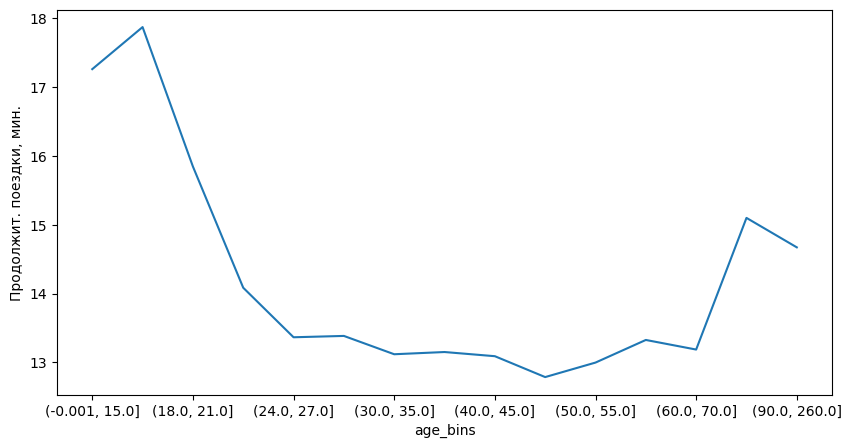

In [24]:
plt.figure(figsize=(10, 5))
plt.xlabel('Возрастные отрезки, года')
plt.ylabel('Продолжит. поездки, мин.')
age_time2.plot()
plt.show()

In [25]:
age_bins = pd.cut(age_time['age'],
                  [0, 15, 18, 21, 24, 27, 30, 35, 40, 45, 50, 55, 60, 70, 90, 150, age_time['age'].max()],
                  include_lowest=True)
age_time['starttime'] = age_time['starttime'].dt.hour + age_time['starttime'].dt.minute / 60
age_time['age_bins'] = age_bins
age_time = age_time[['age_bins', 'starttime']]
age_time = age_time.dropna().groupby('age_bins')['starttime'].mean()

/var/folders/hl/t6sk4wm51pl391hqq4jv44hm0000gp/T/ipykernel_1371/958793555.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_time['starttime'] = age_time['starttime'].dt.hour + age_time['starttime'].dt.minute / 60
/var/folders/hl/t6sk4wm51pl391hqq4jv44hm0000gp/T/ipykernel_1371/958793555.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_time['age_bins'] = age_bins


### График зависимости среднего времени начала поездки от возраста.
Наглядно видно, что есть выбросы в виде людей, которые поставили себе возраст 85+ (в таком возрасте нужно не на велосипеде ездить, а отдыхать с внуками либо на море).

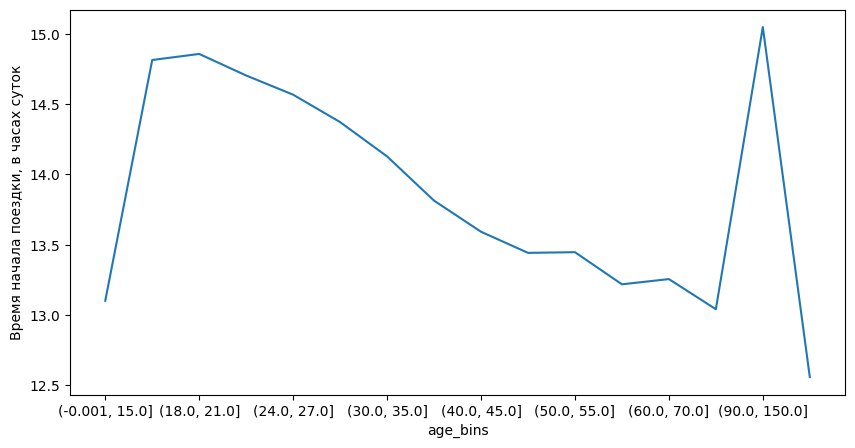

In [26]:
plt.figure(figsize=(10, 5))
plt.ylabel('Время начала поездки, в часах суток')
age_time.plot()
plt.show()

#### Отвечая на вопрос предыд. графика: скидки можно делать с 12:00 до 13:30

In [13]:
age_gender = df[['age', 'gender']]
age_gender['age_bins'] = pd.cut(age_gender['age'],
                  [0, 15, 18, 21, 24, 27, 30, 35, 40, 45, 50, 55, 60, 70, 90, 150, age_gender['age'].max()],
                  include_lowest=True)
age_gender = age_gender.dropna()
age_male = age_gender[age_gender['gender'] == 'Male'].groupby(['age_bins'])['gender'].count()
age_female = age_gender[age_gender['gender'] == 'Female'].groupby(['age_bins'])['gender'].count()
age_gender

/var/folders/hl/t6sk4wm51pl391hqq4jv44hm0000gp/T/ipykernel_1371/2447361106.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_gender['age_bins'] = pd.cut(age_gender['age'],


,age,gender,age_bins
2,25.0,Male,"(24.0, 27.0]"
3,38.0,Male,"(35.0, 40.0]"
6,37.0,Male,"(35.0, 40.0]"
7,52.0,Male,"(50.0, 55.0]"
8,41.0,Female,"(40.0, 45.0]"
...,...,...,...
4522053,62.0,Male,"(60.0, 70.0]"
4522054,32.0,Male,"(30.0, 35.0]"
4522055,43.0,Female,"(40.0, 45.0]"
4522056,32.0,Male,"(30.0, 35.0]"


### График зависимости кол-ва человек от пола. Явно видно, что мужчин гораздо больше.
Скорее всего, стоит запустить специальные тарифы для женщин... Хотя в США это до добра не доведет.
Ну или можно выпустить новые женские велосипеды!

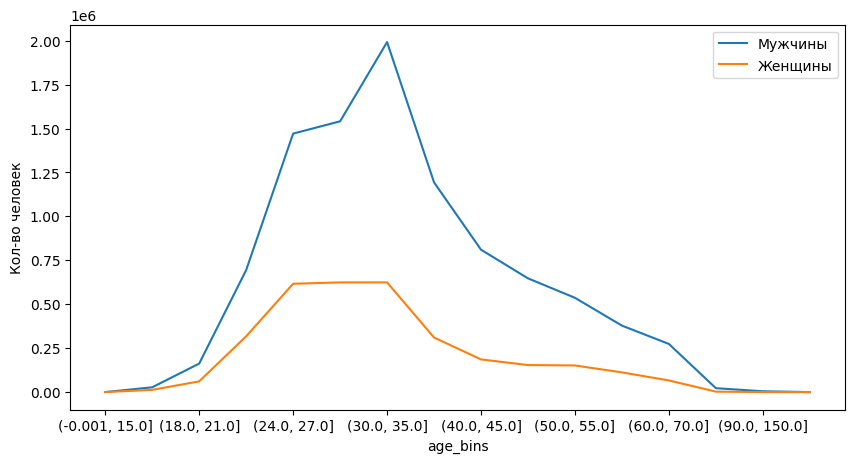

In [33]:
plt.figure(figsize=(10, 5))
plt.ylabel('Кол-во человек')
age_male.plot()
age_female.plot()
plt.legend(['Мужчины', 'Женщины'])
plt.show()

In [47]:
stations = df[['startstation', 'id']]
stations['startstation'] = stations['startstation'].dropna()
stations = stations.groupby('startstation').count().sort_values(by='id', ascending=False)
FIRST_N = 10
stations = stations.head(FIRST_N).axes[0].values.tolist()
print(stations)
startstation_age = df[['startstation', 'age']]
startstation_age = startstation_age.dropna().groupby('startstation').mean()
print(startstation_age)


/var/folders/hl/t6sk4wm51pl391hqq4jv44hm0000gp/T/ipykernel_1371/3439011886.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stations['startstation'] = stations['startstation'].dropna()


['Canal St & Adams St', 'Clinton St & Washington Blvd', 'Lake Shore Dr & Monroe St', 'Clinton St & Madison St', 'Streeter Dr & Grand Ave', 'Theater on the Lake', 'Millennium Park', 'Michigan Ave & Oak St', 'Canal St & Madison St', 'Lake Shore Dr & North Blvd']
                                    age
startstation                           
2112 W Peterson Ave           40.633751
63rd St Beach                 38.796771
900 W Harrison                36.527417
900 W Harrison St             33.834790
Aberdeen St & Jackson Blvd    34.822265
...                                 ...
Wood St & Taylor St           35.418983
Woodlawn Ave & 55th St        32.944337
Woodlawn Ave & 75th St        37.963855
Woodlawn Ave & Lake Park Ave  41.906117
Yates Blvd & 75th St          36.228125

[742 rows x 1 columns]


### График зависимости среднего возраста от топ-10 посещаемых станций.
Как видим, никакой зависимости нет;  гипотеза, что у разных станций разная аудитория не подтвердилась

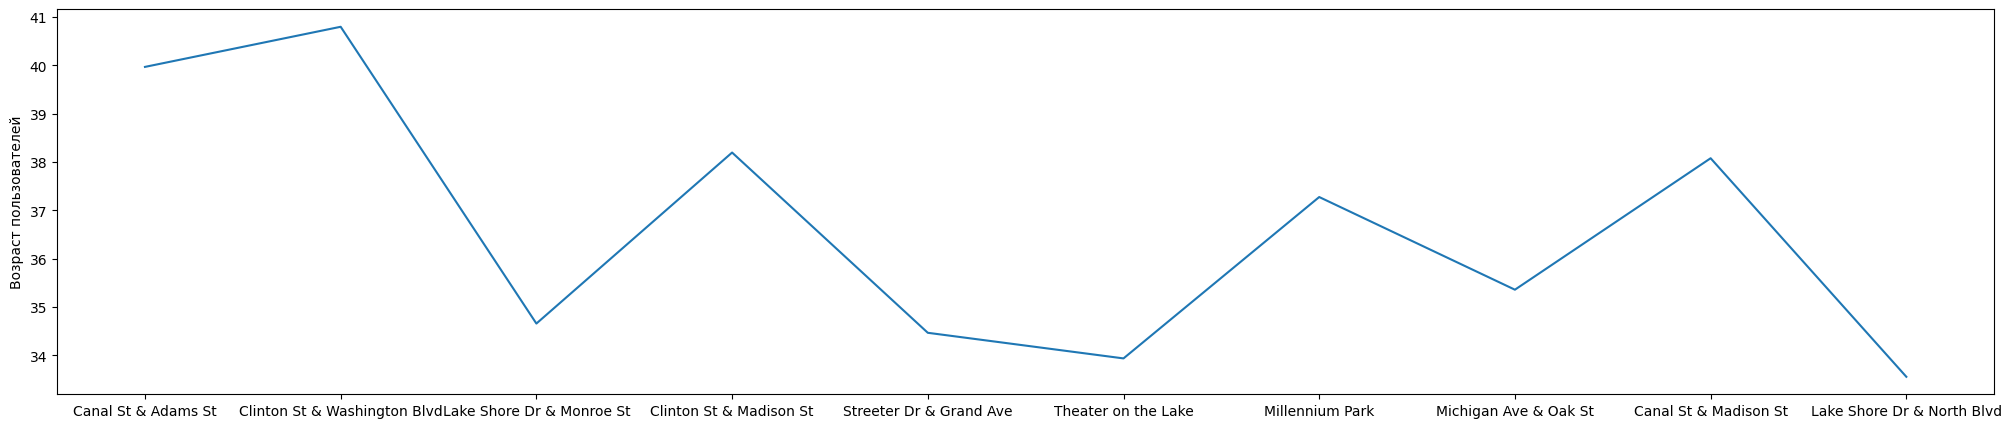

In [49]:
data = {'station': [], 'age': []}
for i in range(FIRST_N):
    # print(startstation_age.axes[0].values)
    data['age'].append(startstation_age.loc[stations[i]][0])
    data['station'].append(stations[i])
plt.figure(figsize=(25, 5))
plt.ylabel('Возраст пользователей')
df2 = pd.DataFrame(data).set_index('station')
plt.plot(df2)
plt.show()


### График разброса кол-ва людей от возраста.
Видно, что молодых преобладающее большинство

In [55]:
age_id = df[['age', 'id']]
age_id = age_id.dropna().groupby('age').count()
a = age_id.axes[0].values
a


array([  5.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  93.,  94.,  95.,  96.,  97.,  98.,  99., 100.,
       101., 102., 103., 104., 105., 106., 107., 108., 109., 110., 112.,
       114., 115., 116., 117., 118., 119., 120., 123., 129., 130., 131.,
       229., 260.])

In [56]:
age_id

,id
age,
5.0,5
13.0,2
14.0,74
15.0,131
16.0,3779
...,...
129.0,1
130.0,3
131.0,20


In [57]:
len(a)

112

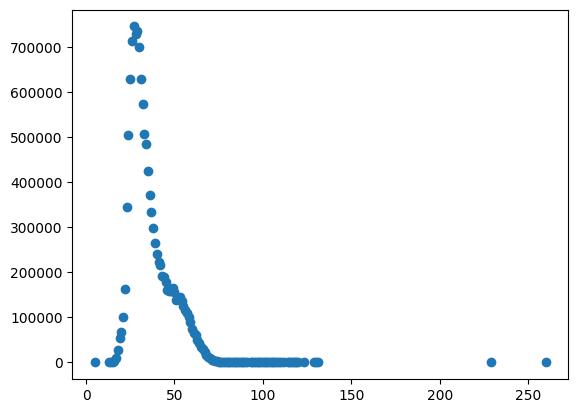

In [58]:
plt.scatter(a, age_id)
plt.show()

In [62]:
from pyspark import SparkConf, SparkContext


def parse(line):
    info = line.split(',')
    # float(info[-2]) - возраст
    # float(info[-3]) - пол
    return [((info[-3], info[-2]), 1)]


conf = SparkConf().setAppName('test').setMaster('local')
sc = SparkContext(conf=conf)

ValueError: Cannot run multiple SparkContexts at once; existing SparkContext(app=test, master=local) created by __init__ at /var/folders/hl/t6sk4wm51pl391hqq4jv44hm0000gp/T/ipykernel_1371/55285182.py:12 

### Процентное соотношение пользователей опред. возраста ко всем польз.
Самые прибыльные (частые) клиенты имеют возраст от 22 до 35 лет

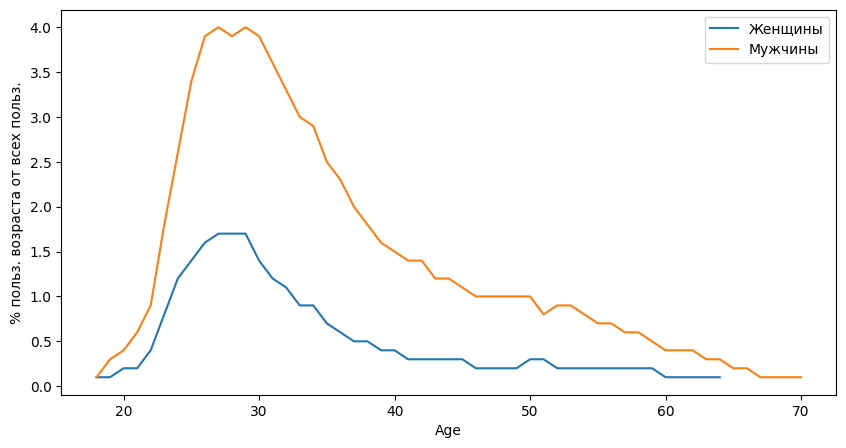

In [64]:
df0 = sc.textFile(f'data/src/{2013}/part-00000')
for i in range(2014, 2020):
    df0 = df0.union(sc.textFile(f'data/src/{i}/part-00000'))

df0 = df0.flatMap(parse).filter(lambda tup: tup[0][0] != '' and tup[0][1] != '').\
    map(lambda tup: ((tup[0][0], float(tup[0][1])), 1)).reduceByKey(lambda v1, v2: v1 + v2)\
    .collect()
summ = 0
for i in df0:
    summ += i[1]

data = {'Gender': [], 'Age': [], 'Num': []}
for i in df0:
    perc = round(i[1] / summ * 100, 1)
    if perc > 0:
        data['Gender'].append(i[0][0])
        data['Age'].append(i[0][1])
        data['Num'].append(perc)

"""from pprint import pprint
pprint(data)
print(summ)"""
plt.figure(figsize=(10, 5))
plt.ylabel('% польз. возраста от всех польз.')
df3 = pd.DataFrame(data)
df3_male = df3[df3['Gender'] == 'Male']
df3_female = df3[df3['Gender'] == 'Female']
df3_male = df3_male.groupby('Age')['Num'].sum()
df3_female = df3_female.groupby('Age')['Num'].sum()
df3_female.plot()
df3_male.plot()
plt.legend(['Женщины', 'Мужчины'])
plt.show()